In [1]:
import numpy as np
from thermopot import materials, calculations, reactions

In [2]:
BaZrS3_calc = calculations.Calculation(volume=0.487976E+03,energy=-1425525.405951922,xc='pbesol',NAtoms=20)
Ba_calc = calculations.Calculation(volume=0.564599E+02,energy=-225060.517335015, xc='pbesol',NAtoms=1)
Zr_calc = calculations.Calculation(volume=0.448970E+02,energy=-197453.101608662,xc='pbesol',NAtoms=2)
S_calc = calculations.Calculation(energy=-0.347575504588933e06,xc="pbesol",NAtoms=32,volume=832.91786077871541)


In [3]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},
                                                          "."
                                                          "./BaZrS3/phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)
Ba = materials.Solid("Ba",{"Ba": 1},"../BaZrS3/phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},"../BaZrS3/phonopy_output/Zr_P63_mmc"
                                    ".dat",calculation=Zr_calc)
S = materials.Solid("S",{"S":1},"../BaZrS3/phonopy_output/S_adam.dat",
                    calculation=S_calc)

In [4]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1})
bulk_reaction.DH().potential

-9.088191297429148

In [5]:
bulk_reaction.Dmu().potential

-9.325351546809543

In [6]:
T = np.linspace(100,1000,100) # K
P = np.array( np.logspace(1,7,100),ndmin=2).transpose() # Pa

bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=T,pressure=P)

In [7]:
bulk_reaction.Dmu().potential

array([[ -9.10942712,  -9.11501307,  -9.12111393, ..., -10.73490946,
        -10.75719091, -10.77953768],
       [ -9.10942712,  -9.11501307,  -9.12111393, ..., -10.73490946,
        -10.75719091, -10.77953768],
       [ -9.10942712,  -9.11501307,  -9.12111393, ..., -10.73490946,
        -10.75719091, -10.77953768],
       ...,
       [ -9.10942712,  -9.11501307,  -9.12111393, ..., -10.73490946,
        -10.75719091, -10.77953768],
       [ -9.10942712,  -9.11501307,  -9.12111393, ..., -10.73490946,
        -10.75719091, -10.77953768],
       [ -9.10942712,  -9.11501307,  -9.12111393, ..., -10.73490946,
        -10.75719091, -10.77953768]])

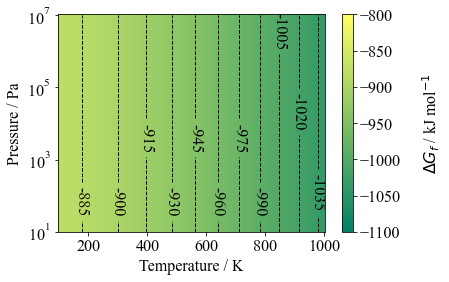

In [8]:
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-800,-1000])

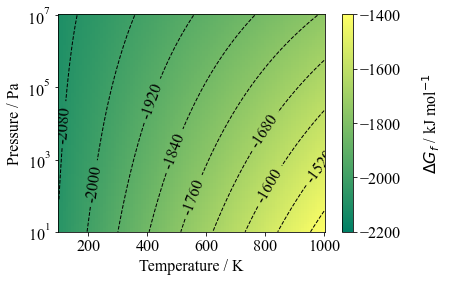

In [9]:
S2 = materials.IdealGas("S2",{'S':2},thermo_file="../BaZrS3/nist_janaf/S2.dat",
                        energies={"pbesol":-0.217220682510473e05},zpe_pbesol=0.04421415)
S2_reaction = reactions.Reaction({Ba:2,Zr:2,S2:3},{BaZrS3:2},
                                 temperature=T,pressure=P)
GFE = S2_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-1400,-2000])

In [2]:
BaZrS3_perovskite=materials.solid(name='Perovskite BaZrS3',
                     stoichiometry={'Ba':1,'Zr':1,'S':3},
                     fu_cell=4,
                     volume=None,
                     pbesol_energy_eV= None,
                     hse06_energy_eV = None,
                     phonons=None,
                     N=None
                     )


TypeError: can only concatenate str (not "NoneType") to str

In [5]:
#BaZrS3 = BaZrS3_perovskite

Ba2ZrS4_RP=materials.solid(name='Ruddlesden-Popper Ba2ZrS4',
                     stoichiometry={'Ba':2,'Zr':1,'S':4},
                     pbesol_energy_eV= None,
                     hse06_energy_eV = None,
                     fu_cell=1,
                     volume=None,
                     phonons=None,
                     N=None
                     )


TypeError: can only concatenate str (not "NoneType") to str

In [ ]:


Ba2ZrS4 = Ba2ZrS4_RP

Ba3Zr2S7_RP=solid(name='Ruddlesden-Popper Ba3Zr2S7',
                     stoichiometry={'Ba':3,'Zr':2,'S':7},
                     pbesol_energy_eV= None,
                     hse06_energy_eV = None,
                     fu_cell=None,
                     volume=None,
                     phonons=None,
                     N=None
                     )


Ba3Zr2S7_Needle=solid(name='Needle-like Ba3Zr2S7',
                     stoichiometry={'Ba':3,'Zr':2,'S':7},
                     pbesol_energy_eV= None,
                     hse06_energy_eV = None,
                     fu_cell=None,
                     volume=None,
                     phonons=None,
                     N=None
                     )

############### Elements ###############

Ba = solid(name='Ba',
           stoichiometry={'Ba':1},
           pbesol_energy_eV=None,
           hse06_energy_eV = None,
           fu_cell=None,
           volume=None,
           phonons=None
)

Zr = solid(name='Zr',
                stoichiometry={'Zr':1},
                pbesol_energy_eV=None,
                hse06_energy_eV = None,
                fu_cell=None,
                volume=None,
                phonons=None
)

S = solid(name='S',
                 stoichiometry={'S':1},
                 pbesol_energy_eV=None,
                 hse06_energy_eV = None,
                 fu_cell=None,
                 volume=None,
                 phonons=None
)


############### Binary sulfides ###############

BaS = solid(name='BaS',
    stoichiometry={'Ba':1,'S':1},
    pbesol_energy_eV=None,
    fu_cell=1,
    volume=None,
    phonons=None,
    N=None,
)

BaS2 = solid(name='BaS2',
    stoichiometry={'Ba':1,'S':2},
    pbesol_energy_eV=None,
    fu_cell=2,
    volume=None,
    phonons=None,
    N=None,
)

BaS3 = solid(name='BaS3',
    stoichiometry={'Ba':1,'S':3},
    pbesol_energy_eV=None,
    fu_cell=2,
    volume=None,
    phonons=None,
    N=None,
)

ZrS_P4_nmm = solid(name='A ZrS',        # NOTE: needs adjusting with xtal type
    stoichiometry={'Zr':1,'S':1},
    pbesol_energy_eV=None,
    fu_cell=2,
    volume=None,
    phonons=None,
    N=None,
)

ZrS_Fm_3m = solid(name='B ZrS',        # NOTE: needs adjusting with xtal type
    stoichiometry={'Zr':1,'S':1},
    pbesol_energy_eV=None,
    fu_cell=1,
    volume=None,
    phonons=None,
    N=None,
)

ZrS = None # NOTE: Needs to be set to most stable isomer


ZrS2_P_31m = solid(name='ZrS2',
    stoichiometry={'Zr':1,'S':2},
    pbesol_energy_eV=None,
    fu_cell=1,
    volume=None,
    phonons=None,
    N=None,
)

ZrS3 = solid(name='ZrS3',
    stoichiometry={'Zr':1,'S':3},
    pbesol_energy_eV=None,
    fu_cell=2,
    volume=None,
    phonons=None,
    N=None,
)


############### Gases ###############


S8=ideal_gas(
    name='S8',
    stoichiometry={'S':8},
    pbesol_energy_eV=None,
    hse06_energy_eV=None,
    thermo_file='nist_janaf/S8.dat',
    zpe_pbesol=None
    N=8
)

S2=ideal_gas(
    name='S2',
    stoichiometry={'S':2},
    pbesol_energy_eV=None,
    hse06_energy_eV=None,
    thermo_file='nist_janaf/S2.dat',
    zpe_pbesol=None,
    N=2
)


S_model_S8ref = sulfur_model('S vapours',S8.pbesol_energy_eV, S8.hse06_energy_eV,'sulfur/mu_pbe0_scaled_S8ref.csv')

S_model = sulfur_model('S vapours',S2.pbesol_energy_eV, S2.hse06_energy_eV,'sulfur/mu_pbe0_scaled_S2ref.csv',N_ref=2)

S = S_model